In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load two datasets
df1 = pd.read_csv('/content/apps.csv')
df2 = pd.read_csv('/content/user_reviews.csv')

# Merge datasets on a common column (like 'App' or 'Category')
df = pd.merge(df1, df2, on='App')  # Adjust 'App' to whatever column you want to merge on


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)  # Impute with mean
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')  # Convert to numeric
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(float)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Text preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [ ]:
def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.lower()  # Lowercase
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')

# Sample preprocess_text function with type checking
def preprocess_text(text):
    if isinstance(text, str):  # Check if the input is a string
        text = re.sub('[^a-zA-Z]', ' ', text)  # Remove special characters
        text = text.lower()  # Lowercase
        tokens = word_tokenize(text)  # Tokenize
        tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
        return ' '.join(tokens)
    else:
        return ""  # Return an empty string for non-string values

# Assuming df is your DataFrame
df['cleaned_reviews'] = df['Translated_Review'].apply(preprocess_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Identify columns with missing values (NaN) and their count
missing_values = df.isna().sum()
print(missing_values[missing_values > 0])  # Display columns with NaN values


Size                      9211
Translated_Review          940
Sentiment                  935
Sentiment_Polarity         935
Sentiment_Subjectivity     935
dtype: int64


In [ ]:
# Fill NaN values for categorical columns (e.g., 'Translated_Review') with an empty string
df['Translated_Review'].fillna('', inplace=True)

# Fill NaN values for numerical columns (e.g., 'Rating', 'Reviews') with the mean or a specific value
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Reviews'].fillna(0, inplace=True)  # Example: Filling NaN with 0 for missing review counts

# Fill NaN in other columns (e.g., 'Size') with a custom logic or a constant value
df['Size'].fillna('Unknown', inplace=True)  # Example: Fill 'Size' column with 'Unknown'


In [ ]:
# Drop rows with NaN in specific columns
df.dropna(subset=['Rating', 'Reviews'], inplace=True)


In [ ]:
# Check if there are any remaining NaN values
print(df.isna().sum())


Unnamed: 0                  0
App                         0
Category                    0
Rating                      0
Reviews                     0
Size                        0
Installs                    0
Type                        0
Price                       0
Content Rating              0
Genres                      0
Last Updated                0
Current Ver                 0
Android Ver                 0
Translated_Review           0
Sentiment                 935
Sentiment_Polarity        935
Sentiment_Subjectivity    935
cleaned_reviews             0
dtype: int64


In [ ]:
# Fill NaN for Sentiment with 'Neutral'
df['Sentiment'].fillna('Neutral', inplace=True)

# Fill NaN for Sentiment_Polarity and Sentiment_Subjectivity with 0
df['Sentiment_Polarity'].fillna(0, inplace=True)
df['Sentiment_Subjectivity'].fillna(0, inplace=True)

# Verify that NaN values have been handled
print(df.isna().sum())


Unnamed: 0                0
App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
cleaned_reviews           0
dtype: int64


In [ ]:
# Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_reviews'])
y = df['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.86      0.32      0.47      1810
     Neutral       0.80      0.08      0.15      1461
    Positive       0.68      0.98      0.81      5486

    accuracy                           0.70      8757
   macro avg       0.78      0.46      0.47      8757
weighted avg       0.74      0.70      0.63      8757



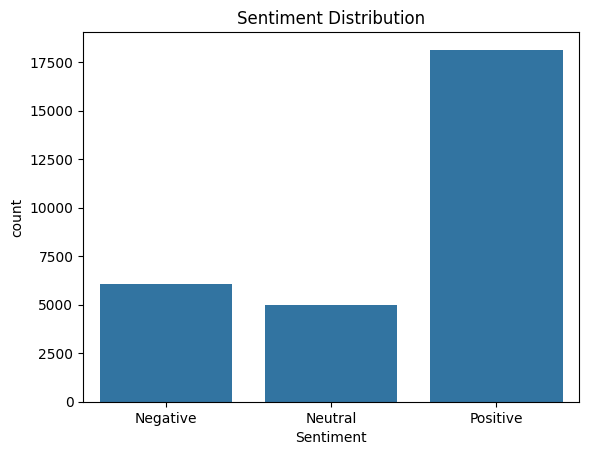

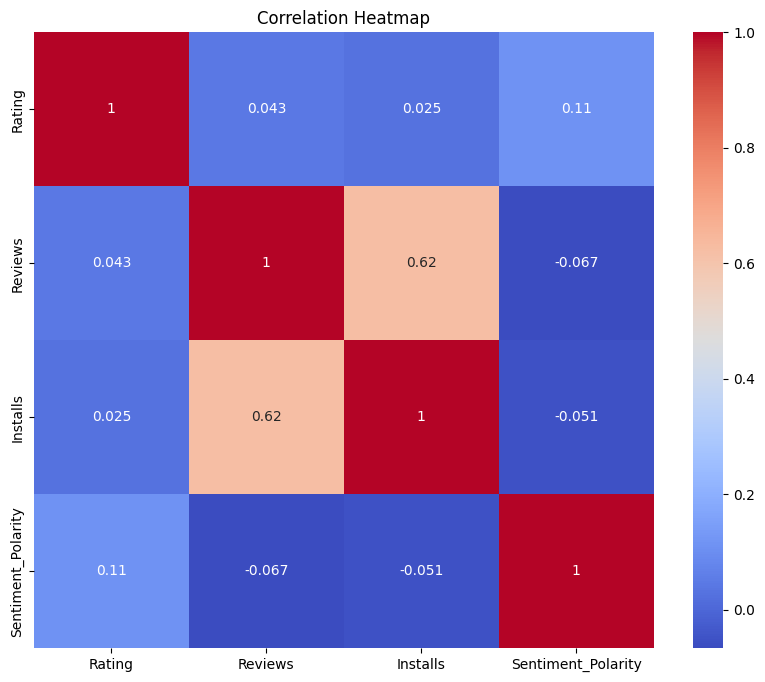

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment distribution
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[['Rating', 'Reviews', 'Installs', 'Sentiment_Polarity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-29-1d8711567f8a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


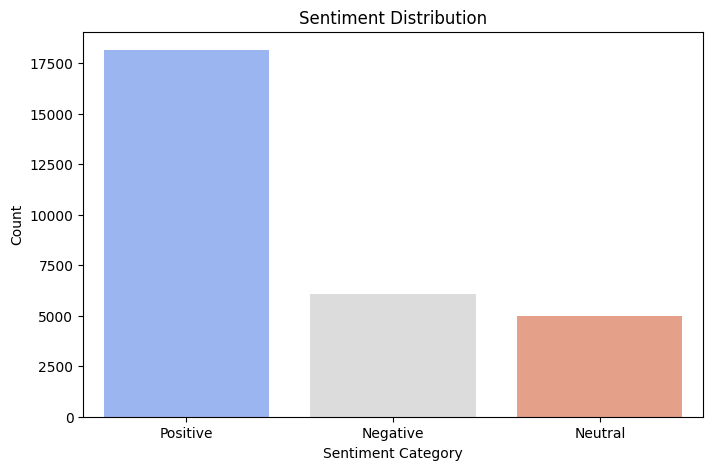

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.ylabel('Count')
plt.xlabel('Sentiment Category')
plt.show()


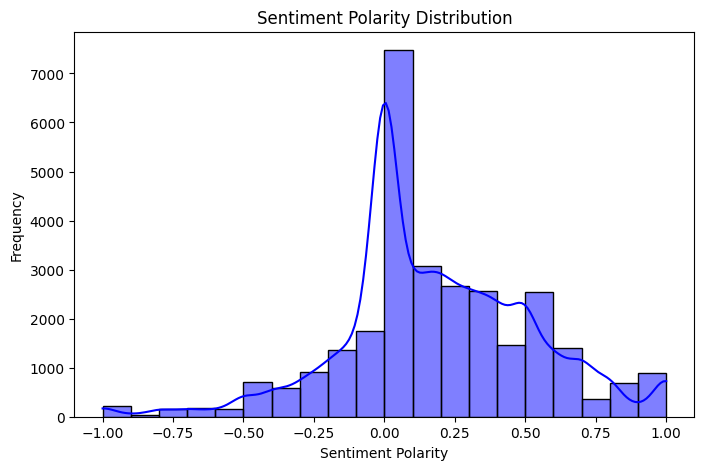

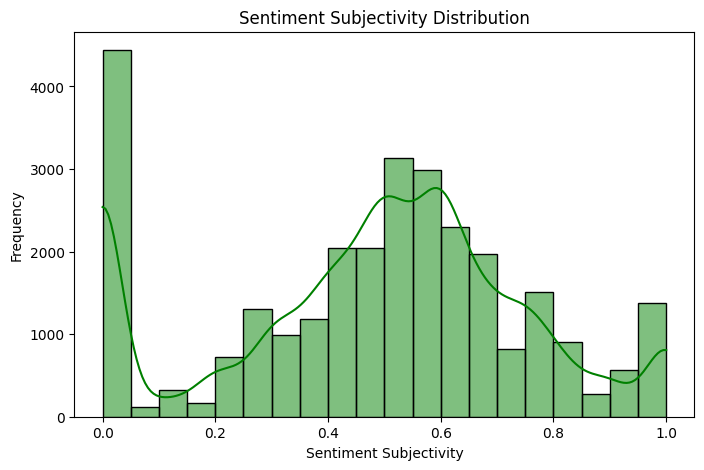

In [ ]:
# Plot Sentiment Polarity distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Sentiment_Polarity'], bins=20, kde=True, color='blue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Plot Sentiment Subjectivity distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Sentiment_Subjectivity'], bins=20, kde=True, color='green')
plt.title('Sentiment Subjectivity Distribution')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frequency')
plt.show()


<ipython-input-31-efd876d2eeb4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_rating.index, y=sentiment_rating.values, palette='coolwarm')


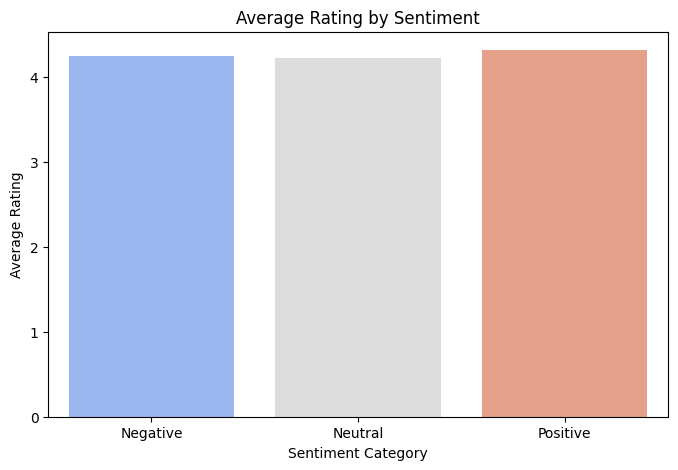

In [ ]:
# Average rating by sentiment
sentiment_rating = df.groupby('Sentiment')['Rating'].mean()

# Plot average rating by sentiment
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_rating.index, y=sentiment_rating.values, palette='coolwarm')
plt.title('Average Rating by Sentiment')
plt.ylabel('Average Rating')
plt.xlabel('Sentiment Category')
plt.show()


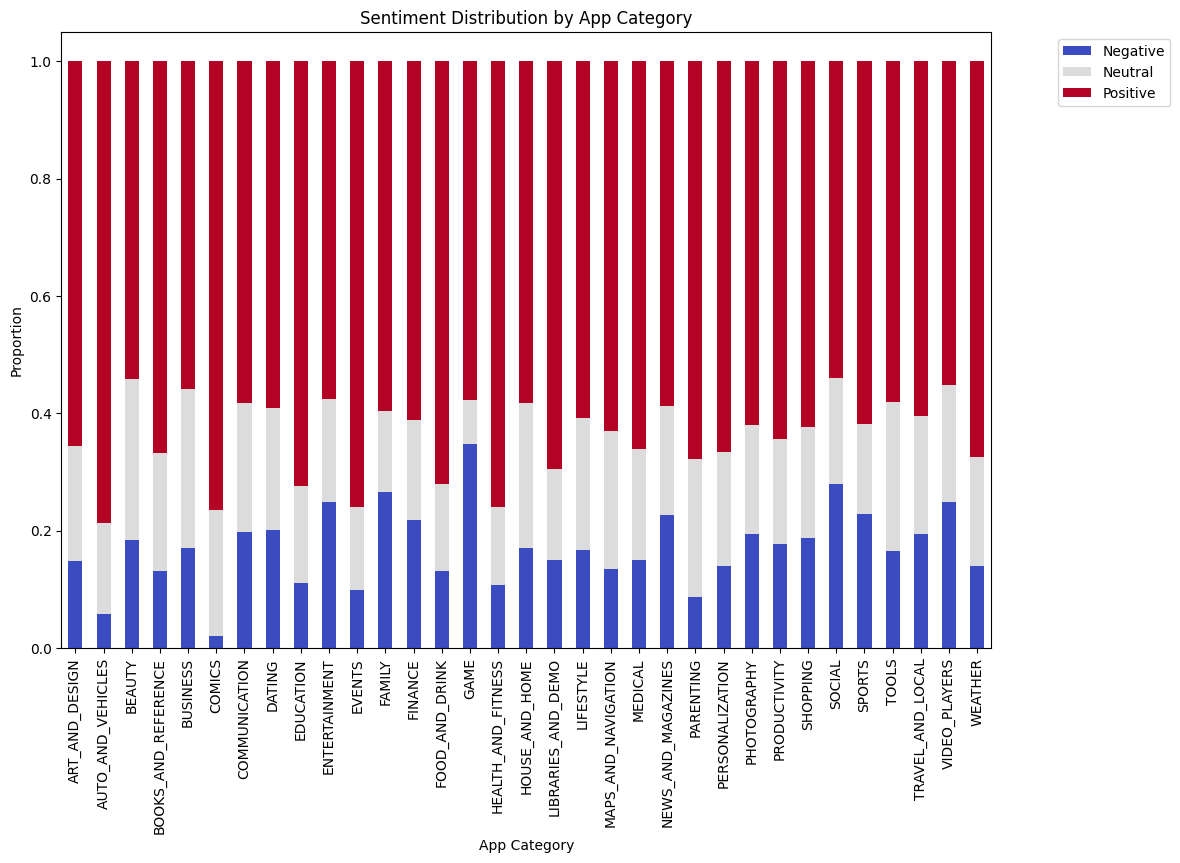

In [ ]:
# Sentiment distribution across app categories
category_sentiment = df.groupby('Category')['Sentiment'].value_counts(normalize=True).unstack()

# Plot sentiment by app category
category_sentiment.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Sentiment Distribution by App Category')
plt.ylabel('Proportion')
plt.xlabel('App Category')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


<ipython-input-33-a85a5de6c7bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Reviews', data=df, palette='coolwarm')


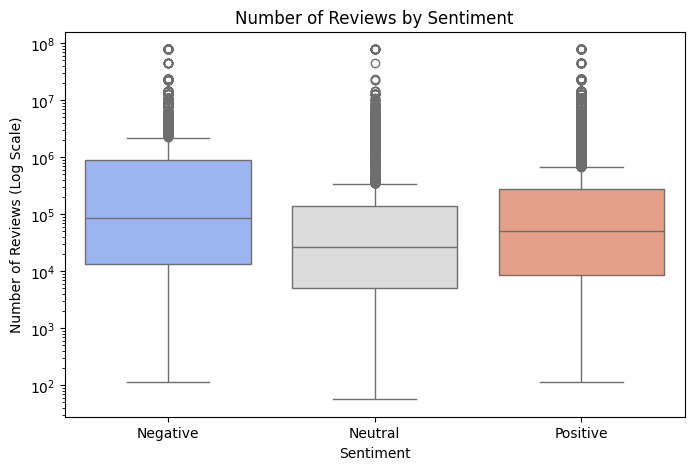

In [ ]:
# Sentiment vs. number of reviews
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sentiment', y='Reviews', data=df, palette='coolwarm')
plt.yscale('log')  # Reviews might have large variations, log scale helps
plt.title('Number of Reviews by Sentiment')
plt.ylabel('Number of Reviews (Log Scale)')
plt.xlabel('Sentiment')
plt.show()


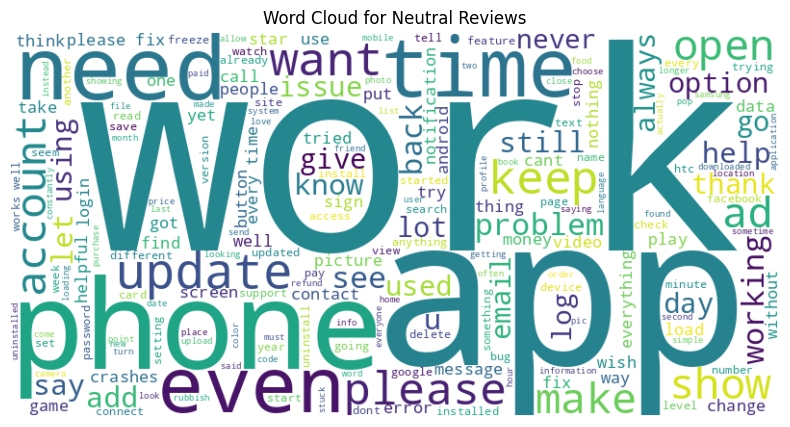

In [ ]:
from wordcloud import WordCloud

# Word cloud for positive reviews
neutral_reviews = ' '.join(df[df['Sentiment'] == 'Neutral']['cleaned_reviews'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Reviews')
plt.show()

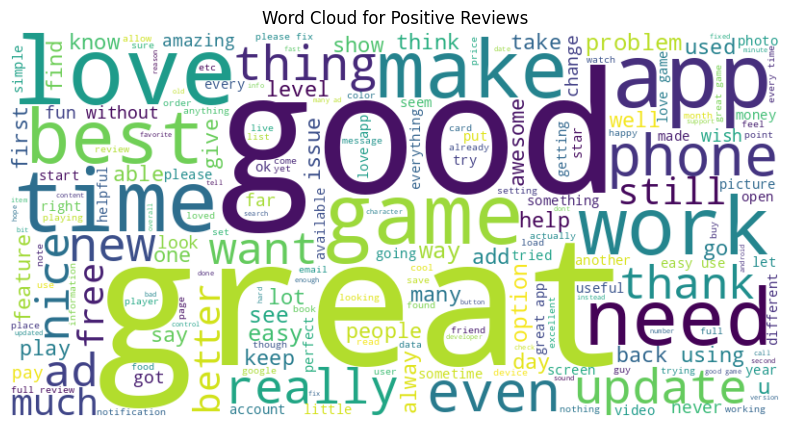

In [ ]:
from wordcloud import WordCloud

# Word cloud for positive reviews
positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['cleaned_reviews'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Repeat for negative and neutral reviews similarly


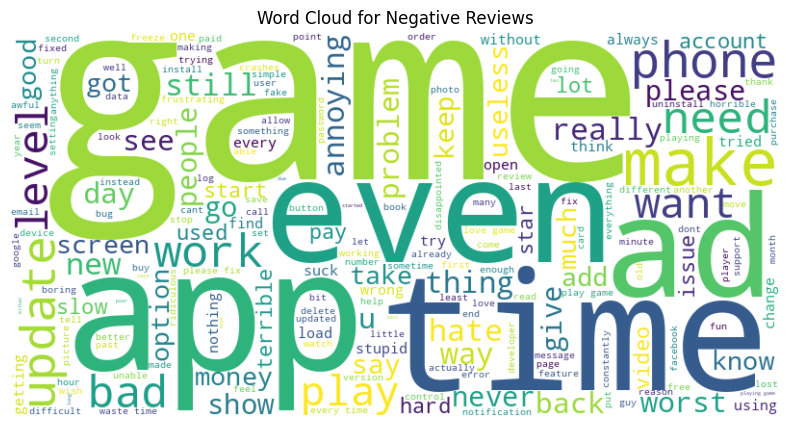

In [ ]:
from wordcloud import WordCloud

# Word cloud for positive reviews
negative_reviews = ' '.join(df[df['Sentiment'] == 'Negative']['cleaned_reviews'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

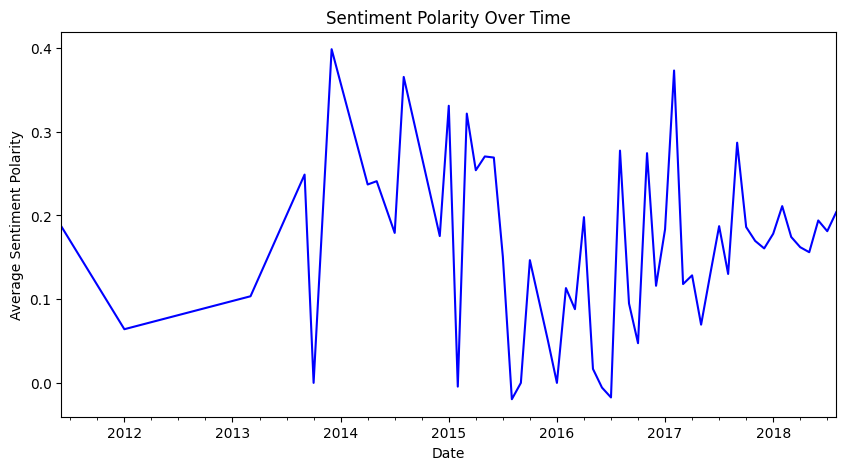

In [ ]:
# Convert 'Last Updated' to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Average polarity by update date
polarity_time = df.groupby(df['Last Updated'].dt.to_period('M'))['Sentiment_Polarity'].mean()

# Plot sentiment polarity over time
plt.figure(figsize=(10, 5))
polarity_time.plot(kind='line', color='blue')
plt.title('Sentiment Polarity Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.show()
